<a href="https://colab.research.google.com/github/alicezil/38615-Lab-1/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 38615 Lab 1: Exploratory Data Anlysis


Contents:
1.   Loading and Preparing Data for Analysis
2.   Finding and Dealing With Correlation in Data
3.   Establish Target Variable and Plot it's Distribution
4.   Using Different Strategies to Analyze the Dataframe





# 1. Loading and Preparing Data for Analysis

**1.1 Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline 
sns.set(color_codes=True)

**1.2 Loading the data into the data frame**

In [2]:
df = pd.read_csv("/content/lab1_dataset.csv")
df.shape

(2000, 552)

**1.3 Basic data preperation**

In [3]:
# removing duplicate rows if there are any
df = df.drop_duplicates()    

# dropping the missing values
df = df.dropna()             

# dropping not numerical columns
for col in df:
    if df[col].dtypes != 'float64' and df[col].dtypes != 'int64':
      df = df.drop([col],axis=1)

df.shape

(1900, 549)

**1.4 Removing outliers**

In [4]:
#getting a summary table that includes mean and standard deviation
df_summary = df.describe(include = 'all')

#using the standard deviation to remove outliers (where outlier = 4 standard devs away from the mean)
for col in df:
  std = df_summary[col]['std']
  mean = df_summary[col]['mean']
  if df[col].dtypes == 'int64' or df[col].dtypes == 'float62':
    for i in df.index:
      if ((df[col][i] < (mean - 4*std)) or (df[col][i] > (mean + 4*std))):
        df = df.drop([i])

df.shape

(1630, 549)

#2. Finding Correlation in Data

**2.1 Constructing a correlation matrix**

In [5]:
#create correlation matrix
corr_matrix = df.corr().abs()

**2.2 Removing highly correlated data**

In [6]:
#isolate upper triangle (for lack of repetition)
upper_triangle = corr_matrix.where((np.triu(np.ones(corr_matrix.shape), k=1) + 
                           np.tril(np.ones(corr_matrix.shape), k=-1)).astype(bool))

#make a list of columns with correlation larger than .97
drop_list = []
for col in upper_triangle.columns:
  if any(upper_triangle[col] > 0.97):
    drop_list.append(col)

#drop all the columns from the list
df.drop(drop_list, axis=1, inplace=True)

df.shape

(1630, 237)

#3. Establish Target Variable and Plot it's Distribtuion

**3.1 Establishing a target variable**

In [7]:
#show top of the data
df.head()

,experimental_proprty,nHetero,nX,C2SP3,NaasN,nFAHRing,AATS3d,nHBDon,nAcid,PEOE_VSA8,...,ATSC6d,ATS5dv,NsssCH,AATSC2v,PEOE_VSA12,IC1,EState_VSA5,AATSC1dv,nFARing,n6Ring
0,3.54,5,1,0,1,0,3.127273,0,0,43.936717,...,-4.444444,222.888889,0,4.021507,0.00000,3.133948,11.204087,1.102539,0,3
1,-1.18,11,0,3,0,1,3.477273,2,1,12.108208,...,-9.756392,736.333333,1,4.393094,5.90718,3.847419,30.657545,0.854039,1,3
2,3.69,5,1,2,0,1,3.400000,0,0,22.989293,...,-3.103725,327.444444,1,5.398449,0.00000,3.524624,17.550396,0.793417,1,2
3,3.37,9,1,3,0,1,3.309735,4,0,17.494432,...,-5.502836,582.777778,2,-0.991896,5.90718,4.110093,16.236696,0.421656,1,2
4,3.10,7,0,2,1,0,2.816000,2,0,18.883484,...,0.297521,510.000000,1,7.240313,5.90718,3.555674,4.681803,1.602810,0,1


The 'experimental_proprty' column sounds like it may be our target variable. Let's get more info on it:

In [8]:
#summary of possible target variable column
df['experimental_proprty'].describe()

count    1630.000000
mean        2.165546
std         1.197310
min        -1.500000
25%         1.390000
50%         2.350000
75%         3.080000
max         4.500000
Name: experimental_proprty, dtype: float64

It seems like the range is quite small since the min is -1.5 and the max is 4.5. If you look at the quartiles they all have a difference of approximately 1 which leads me to believe that if we cast the column to integers instead of floats we can have approximetely 6 sections -1, 0, 1, 2, 3, and 4. This will make the analysis neater and more understandable.

In [9]:
#casting the target variable column to int
df = df.astype({'experimental_proprty':'int'})

#checking that the values are now integers (they are!)
df['experimental_proprty'].head()

0    3
1   -1
2    3
3    3
4    3
Name: experimental_proprty, dtype: int64

**3.2 Analyzing distribution of target variable**

Text(0.5, 0, 'Value')

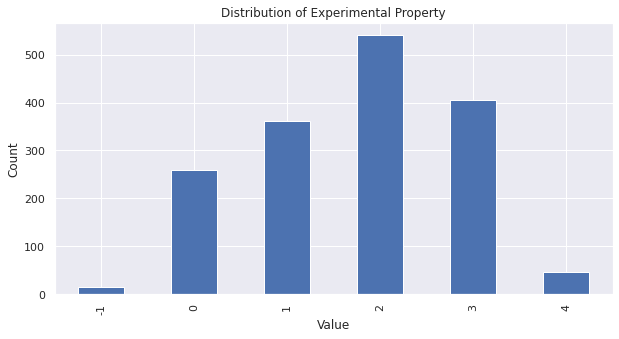

In [10]:
#plotting distribution
df['experimental_proprty'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Experimental Property')
plt.ylabel('Count')
plt.xlabel('Value')

The distribution of the target variable is approximatly normal with a slight skew to the left.

#4. Using Different Strategies to Analyze the Dataframe

**4.1 Setting up the features and target variable for analysis**

In [11]:
df_new = df.copy(deep=True)
df_new = df_new.drop(['experimental_proprty'], axis=1)
y = df['experimental_proprty']

#scaling the feature data
scaler = StandardScaler()
df_new = scaler.fit_transform(df_new)


**4.2 Setting up PCA, plotting a scree plot, and plotting the PCA**

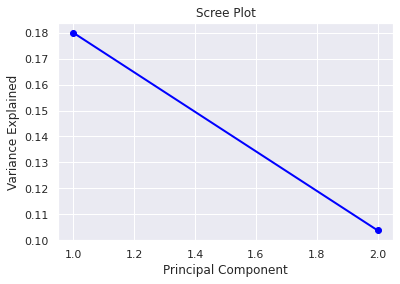

In [14]:
#applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_new)

#plotting a scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

plotting PCA with 2 principal components (a majority of the variance can be explained with the first 2 pc's)

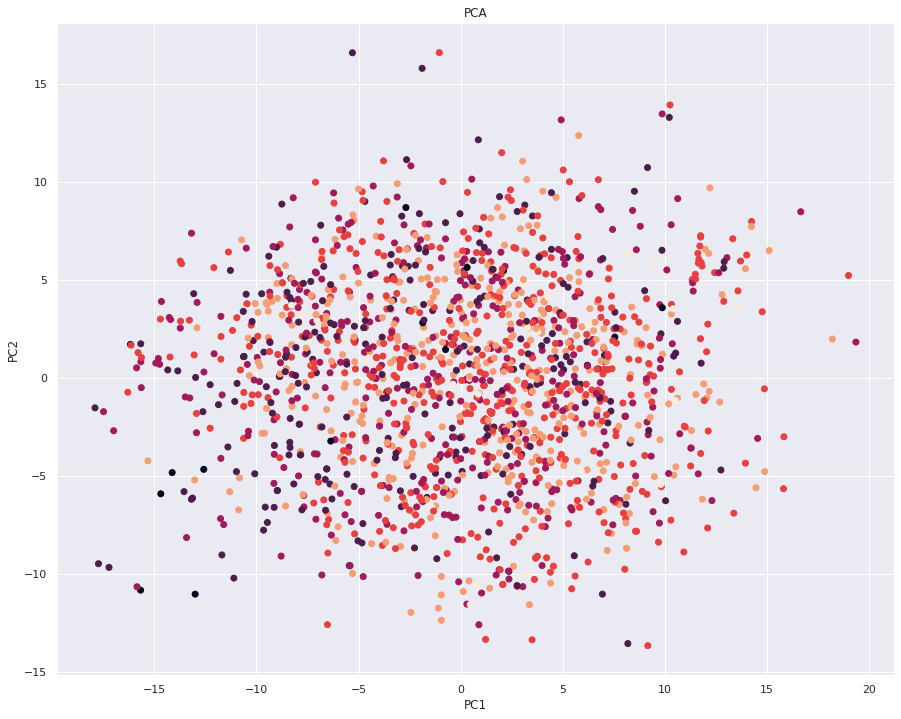

In [15]:
#plotting PCA
plt.rcParams['figure.figsize'] = [15, 12]
plt.scatter(principalComponents[:,0], principalComponents[:,1], c = y)
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

PCA Analysis: We can see a lack of clustering or seperation between the values of target variable (the colors of the points). This shows that generally there is no more similarity amongst each value of target variable than between the values.

**4.3 Setting and plotting Isomap**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


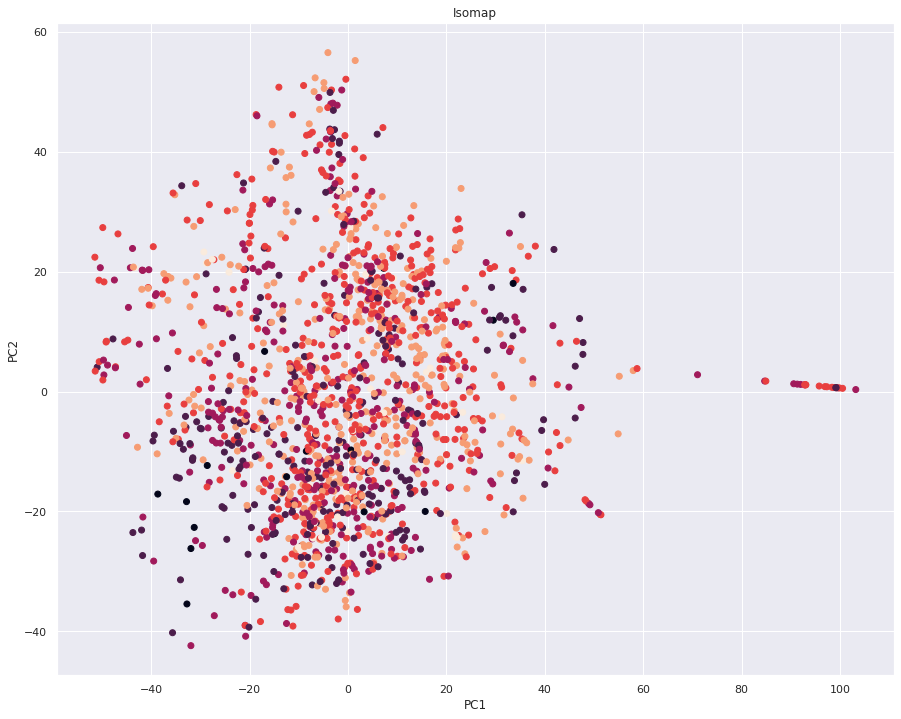

In [16]:
#applying isomap 
isomap = manifold.Isomap(n_neighbors=5, n_components=2)
isomapComponents = isomap.fit_transform(df_new)

#plotting Isomap
plt.scatter(isomapComponents[:,0], isomapComponents[:,1], c = y)
plt.title('Isomap')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Isomap Analysis: A lot of the isomap plot seems similar to the PCA plot; however, on the right we can see that approximetely at PC2 = 0, PC1 gets very large causing a tail to the right of the main cluster of points. Most of these points are darker and color which means that certain values of the target variable do have higher similarity when the distance is computed with geodesic distance instead of euclidian.

**4.4 Setting and plotting tSNE**

tSNE with perplexity 5



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


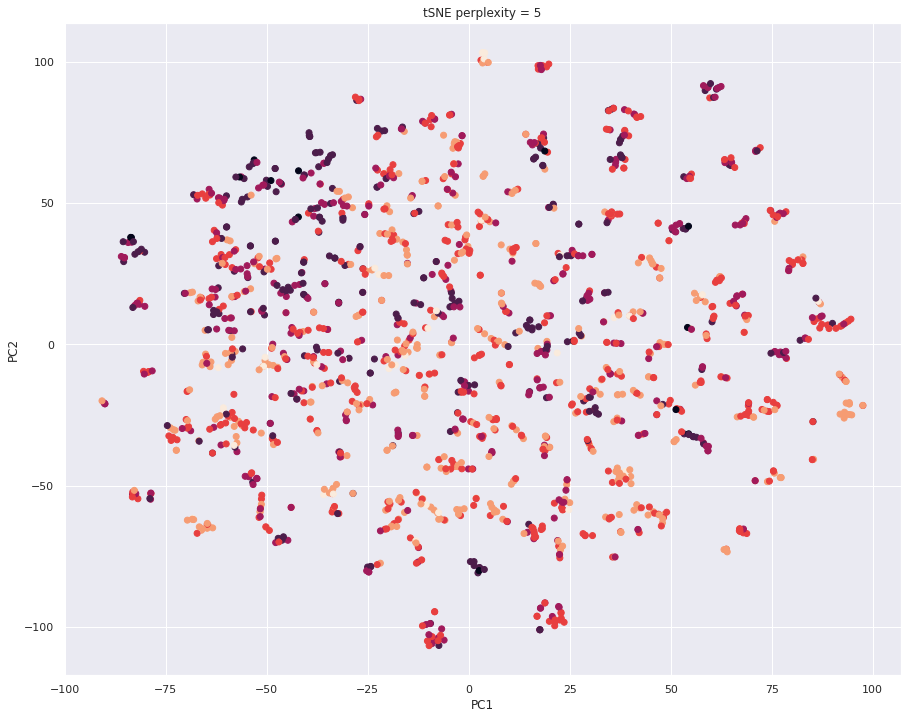

In [17]:
#applying tSNE
tsne = manifold.TSNE(perplexity=5, random_state=42, n_components=2)
tsneComponents = tsne.fit_transform(df_new)

#plotting tSNE
plt.scatter(tsneComponents[:,0], tsneComponents[:,1], c = y)
plt.title('tSNE perplexity = 5')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

tSNE p = 5 Analysis: With perplexity 5 the local variations are going to dominate. We can see some small grouping but for the most part it is not divided y color and therefore not divided by value of target variable.

tSNE with perpleity 30

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


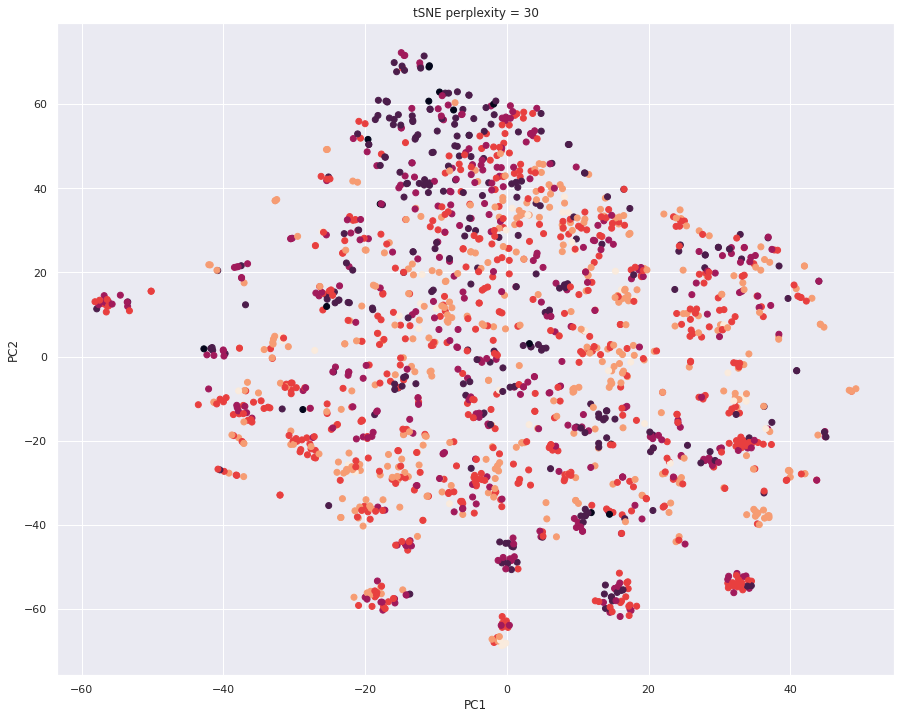

In [18]:
#applying tSNE
tsne = manifold.TSNE(perplexity=30, random_state=42, n_components=2)
tsneComponents = tsne.fit_transform(df_new)

#plotting tSNE
plt.scatter(tsneComponents[:,0], tsneComponents[:,1], c = y)
plt.title('tSNE perplexity = 30')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

tSNE p = 30 Analysis: With perplexity 30, local and global variations are more equal with local still dominating a little. We can see bigger groups forming as well as a further lack of groups in the main central cluster. Since the groups are mostly dark in color perhaps this solidifies what we saw in the isomap plot with some extra similarity amongst certain values of the target variable.

tSNE with perplexity 50

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


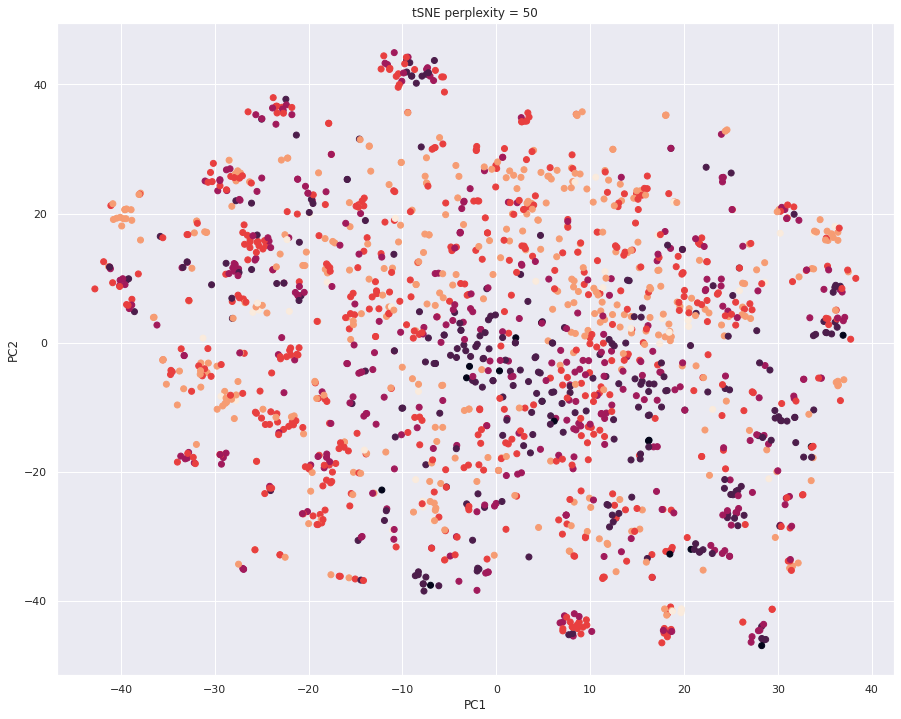

In [19]:
#applying tSNE
tsne = manifold.TSNE(perplexity=50, random_state=42, n_components=2)
tsneComponents = tsne.fit_transform(df_new)

#plotting tSNE
plt.scatter(tsneComponents[:,0], tsneComponents[:,1], c = y)
plt.title('tSNE perplexity = 50')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

tSNE p = 50 Analysis: With perplexity 50, local and global variations are approximetely equally consdiered. Similarly to perplexity = 30 we can see some groups of darker colors forming but generally the main cluster of data is even further spread out.

tSNE with perplexity 100

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


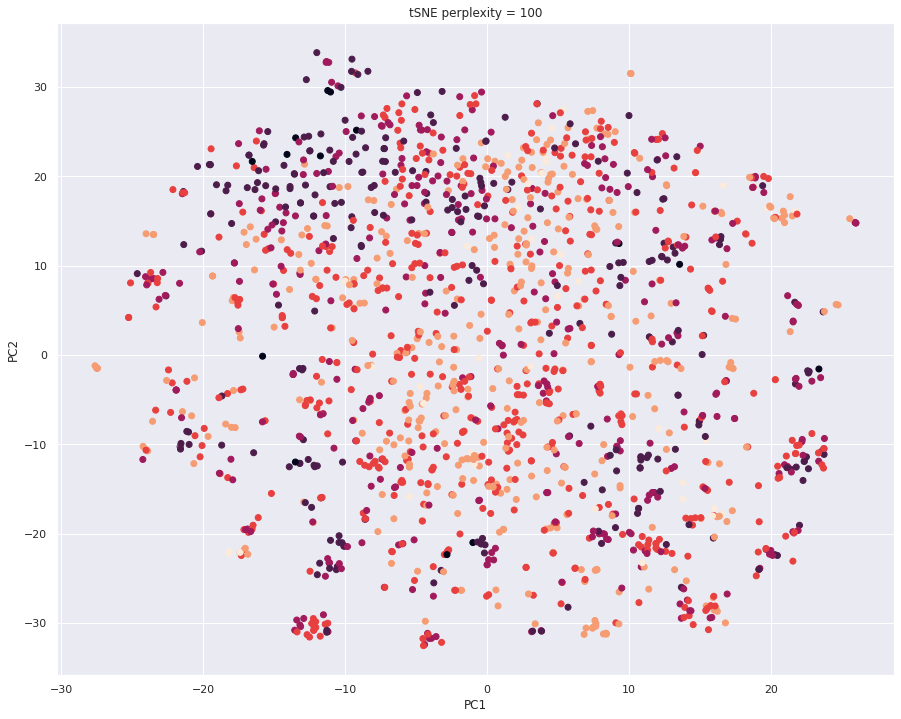

In [20]:
#applying tSNE
tsne = manifold.TSNE(perplexity=100, random_state=42, n_components=2)
tsneComponents = tsne.fit_transform(df_new)

#plotting tSNE
plt.scatter(tsneComponents[:,0], tsneComponents[:,1], c = y)
plt.title('tSNE perplexity = 100')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

tSNE p = 100 Analysis: With perplexity 100, global variations are dominating. At this point there is little similarity amongst the data as there are few clusters. Again, the little grouping there is tends to be of darker colors implying some similarity in certain values of the target variable.